7. 머신러닝 데이터 분석

1. 머신러닝 개요
    
1-1. 머신러닝이란?

스스로 데이터를 학습하여 서로 다른 변수 간의 관계를 찾아 나가는 과정.
예측, 분류, 군집 알고리즘 
Prediction(예측, y값 필요) - Classification(분류), Regresson(회귀분석, 예측)
Description(기술, y값 노필요) - Clustering(군집) 

1-2. 지도 학습 vs 비지도 학습

지도 학습 : 정답 알고 있는 상태에서 학습, 모형 평가 방법이 다양한 편, 회귀분석, 분류에 사용
비지도 학습 : 정답 데이터 없고 스스로 숨은 패턴 찾아내는 방식, 모형 평가 방법이 제한적. 군집 분석에 사용

1-3. 머신러닝 프로세스 

컴퓨터 알고리즘이 이해할 수 있는 형태로 데이터를 변환하는 작업이 선행 되어야 함. 
데이터프레임으로 정리. 열은 속성, 행은 관측값



2. 회귀분석

분석 모형이 예측하고자 하는 목표를 종속 변수 또는 예측 변수라고 부른다. 예측을 위해 모형이 사용하는 속성을 독립 변수 또는 설명 변수

2-1. 단순회귀분석

단순회귀분석 : 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘. 지도학습 유형


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('C:/Users/pc/Desktop/판다스터디/5674-833_4th/part7/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 데이터 살펴보기
print(df.head())   
print('\n')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())   
print('\n')


'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
print("info")
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print("describe")
print(df.describe())
print('\n')

# horsepower 열의 자료형 변경 (문자열 ->숫자)
print("horsepower unique")
print(df['horsepower'].unique())          # horsepower 열의 고유값 확인
print('\n')

df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환
print("describe 2")
print(df.describe())                                     # 데이터 통계 요약정보 확인
print('\n')


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

head
    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0




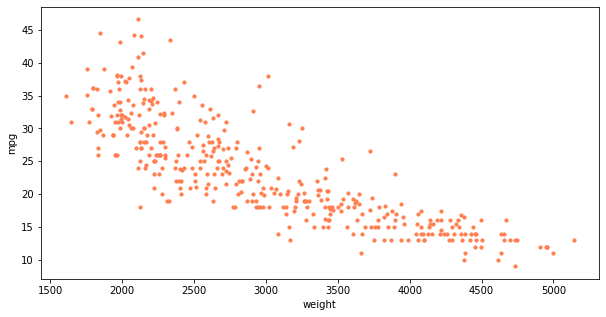

In [2]:
'''
[Step 3] 속성(feature 또는 variable) 선택
'''

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량) 종속 mpg, 독립 cylinders, horsepower, weight
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print("head")
print(ndf.head())   
print('\n')

### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인 
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()



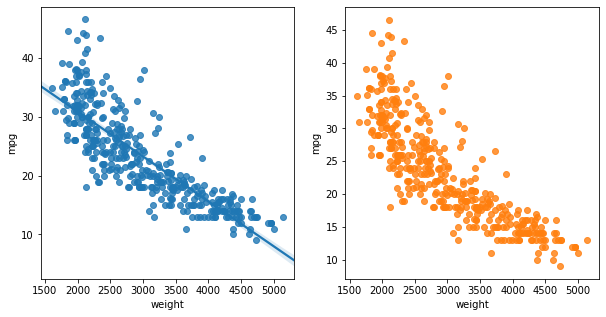

In [3]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시 fit_reg = false
plt.show()
plt.close()

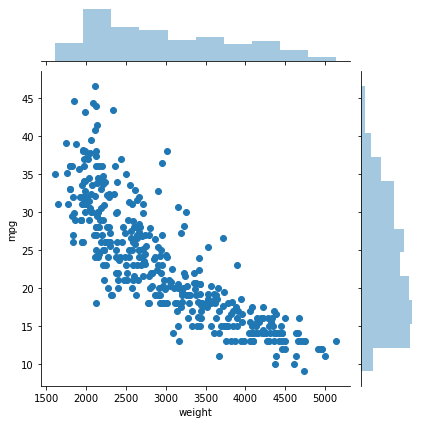

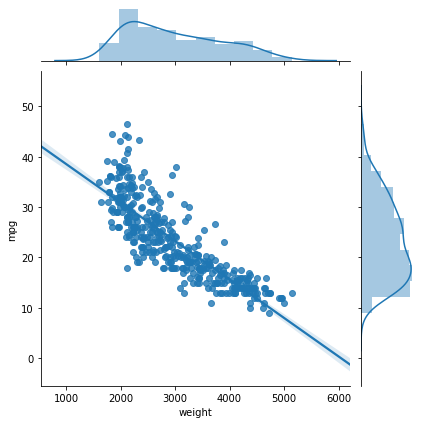

In [4]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)  # 회귀선 표시 kind = reg
plt.show()
plt.close()

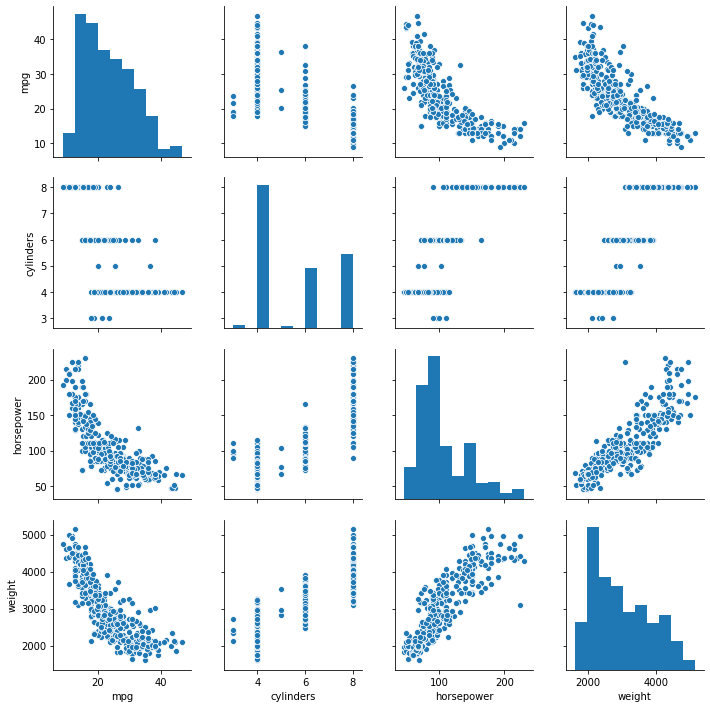

In [5]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)  
plt.show()
plt.close()

#선형관계는 mpg-horespower, mpg-weight


In [6]:

'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%   tedt 3 : 7 train
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))
X_train

train data 개수:  274
test data 개수:  118


,weight
38,4209.0
172,2223.0
277,3410.0
196,2164.0
357,2615.0
342,2385.0
276,2795.0
280,3245.0
125,3102.0
82,2506.0


0.6822458558299325


기울기 a:  [-0.00775343]


y절편 b 46.7103662572801




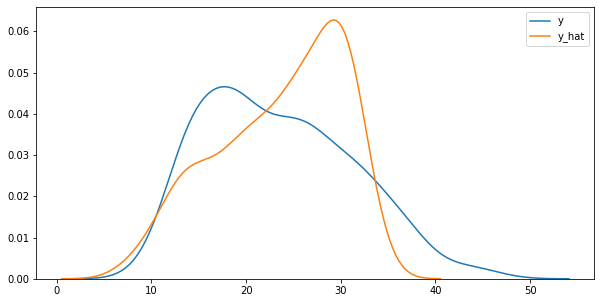

In [7]:

'''
Step 5: 단순회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성 LinearRegression() 함수로 회귀분석 모형 객체를 생성하여 변수 lr에 저장
lr = LinearRegression()   

# train data를 가지고 모형 학습 fit() 메소드 적용하고 훈련 데이터 전달하면 모형이 학습을 통해 회귀 방정식 계수 a,b 찾는다
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산 score메소드로 결정계수 구함 클수록 좋음
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

2-2. 다항회귀분석

독립 변수와 종속 변수 사이 관계가 곡선으로 설명하기 적합할 때 사용
y = ax^2+bx+c

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1 ~ 4] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('C:/Users/pc/Desktop/판다스터디/5674-833_4th/part7/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
print('\n')



훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)




In [9]:

# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형 x_train 1개의 열이 3개로 늘어난다.???

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  
print('\n')

# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)
print('\n')


원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


0.7087009262975481




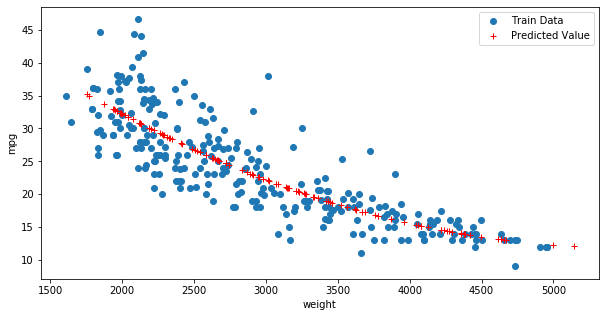

In [10]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

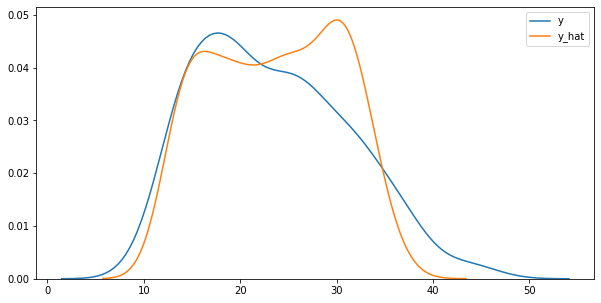

In [11]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

2-3. 다중회귀분석

여러개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우

지도학습으로 분류

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1 ~ 3] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('C:/Users/pc/Desktop/판다스터디/5674-833_4th/part7/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]


'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['cylinders', 'horsepower', 'weight']]  #독립 변수 X1, X2, X3
y=ndf[['mpg']]     #종속 변수 Y
print(X)
print(y)
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
print('\n') 
y_train

     cylinders  horsepower  weight
0            8       130.0  3504.0
1            8       165.0  3693.0
2            8       150.0  3436.0
3            8       150.0  3433.0
4            8       140.0  3449.0
5            8       198.0  4341.0
6            8       220.0  4354.0
7            8       215.0  4312.0
8            8       225.0  4425.0
9            8       190.0  3850.0
10           8       170.0  3563.0
11           8       160.0  3609.0
12           8       150.0  3761.0
13           8       225.0  3086.0
14           4        95.0  2372.0
15           6        95.0  2833.0
16           6        97.0  2774.0
17           6        85.0  2587.0
18           4        88.0  2130.0
19           4        46.0  1835.0
20           4        87.0  2672.0
21           4        90.0  2430.0
22           4        95.0  2375.0
23           4       113.0  2234.0
24           6        90.0  2648.0
25           8       215.0  4615.0
26           8       200.0  4376.0
27           8      

,mpg
38,14.0
172,25.0
277,16.2
196,24.5
357,32.9
342,30.0
276,21.6
280,21.5
125,20.0
82,23.0


0.6939048496695599


X 변수의 계수 a:  [-0.60691288 -0.03714088 -0.00522268]


상수항 b 46.41435126963404




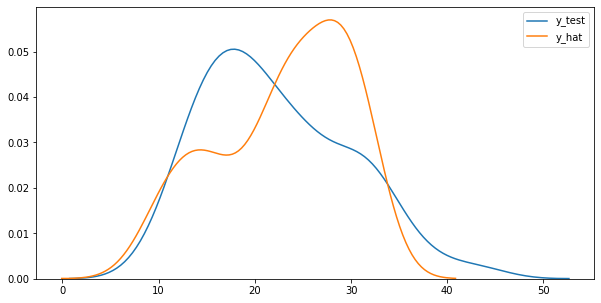

In [13]:

'''
Step 5: 다중회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_) #'cylinders', 'horsepower', 'weight' 
print('\n')

# 회귀식의 y절편
print('상수항 b', lr.intercept_)
print('\n')

# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label="y_test")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()


3. 분류

분류 : 예측하려는 대상의 속성(설명 변수)을 입력 받고 목표 변수가 갖고 있는 카테고리 (범주형) 값 중에서 어느 한 값으로 분류하여 예측
지도학습 유형


3-1. KNN

k개의 가까운 이웃. 새로운 관측값이 주어지면 기존 데이터 중에서 가장 속성이 비슷한 k개의 이웃을 먼저 찾고 가까운 이웃들이 갖고 있는 목표 값과 같은 값으로 분류하여 예측.
적절한 k값을 찾는 것이 매우 중요. k에 따라 예측 정확도 달라짐

In [14]:
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비 - Seaborn에서 제공하는 titanic 데이터셋 가져오기
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

# 데이터 살펴보기
print(df.head())   
print('\n')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)
print(df.head())   
print('\n')



   survived  pclass     sex   age  sibsp  ...  adult_male  deck  embark_town  \
0         0       3    male  22.0      1  ...        True   NaN  Southampton   
1         1       1  female  38.0      1  ...       False     C    Cherbourg   
2         1       3  female  26.0      0  ...       False   NaN  Southampton   
3         1       1  female  35.0      1  ...       False     C  Southampton   
4         0       3    male  35.0      0  ...        True   NaN  Southampton   

  alive  alone  
0    no  False  
1   yes  False  
2   yes   True  
3   yes  False  
4    no   True  

[5 rows x 15 columns]


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0 

In [15]:

'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
print(df.info())  
print('\n')

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  
print(rdf.columns.values)
print('\n')

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  
print(len(rdf))
print('\n')

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
print("most freq")
print(most_freq)
print('\n')

print(rdf.describe(include='all'))
print('\n')

rdf['embarked'].fillna(most_freq, inplace=True)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


714


most freq
S


          survived      pclass   sex         age       sibsp       parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.0000

In [28]:


'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택  예측변수 survived 추가 나머지 설명변수
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
print(ndf.head())   
print('\n')

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환, 더미변수(male, female)열 생성
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town') #열 이름에 접두어 town 붙임
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())   
print('\n')



   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1




In [32]:

'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)



train data 개수:  (499, 9)
test data 개수:  (215, 9)


분류 모형 예측력 평가 지표

TP-예측T, 실제T
FP-예측T, 실제F
TN-예측F, 실제F
FN-예측F, 실제T

1.confusion matrix
모형이 예측하는 값에 두가지 (T,F)가 있고 각 예측값은 실제로 T,F중 하나 
예측과 실제를 행열로 표현
    
2.정확도(Precision)
T로 예측한 분석대상 중에서 실제 값이 T인 비율을 말하며, 모형의 정확성을 나타내는 지표가 된다. 정확도가 높다는 것은 실제 F를 T로 잘못 예측하는 오류가 작다는 뜻
(TP/(TP+FN))
    
3.재현율(Recall)
실제 값이 T인 분석대상 중에서 T로 예측하여 모형이 적중한 비율. 모형의 완전성을 나타내는 지표. 재현율이 높다는 것은 실제 T를 예측 F로 잘못 예측하는 오류가 작다는 뜻
(TP/(TP+FN))

4.F1 지표(F-score)
정확도와 재현율이 균등하게 반영될 수 있도록 정확도와 재현율의 조화 평균을 계산한 값으로 모형의 예측력을 종합적으로 평사하는 지표. 높을수록 예측력 좋다
2*(정확도*재현율)/(정확도+재현율)

In [33]:

'''
[Step 5] KNN 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모형 학습
knn.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
knn_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(knn_matrix)
#TP FP
#FN TN

# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)            
print(knn_report)

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]
[[109  16]
 [ 25  65]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.80      0.72      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



3-2.SVM (Support Vector Machine)

벡터 개념을 가져와서 사용. 데이터프레임의 각 열을 열 벡터 형태로 구현. 분석 대상이 되는 개별 관측값은 모든 속성(열 벡터)에 관한 값을 해당 축의 좌표로 표시하여 벡터 공간에서의 위치를 나타낸다. 

벡터 공간에 위치한 훈련 데이터의 좌표와 각 데이터가 어떤 분류 값을 가져야 하느닞 정답을 입력 받아서 학습. 
같은 분류 값을 갖는 데이터끼리 같은 공간에 위치하도록 벡터 공간을 여러개로 나눌 수 있다면 새로운 데이터에 대해서도 어느 공간에 위치하는지 분류할 수 있다.

In [34]:
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색/ 전처리
'''

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)


In [35]:

'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)


'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')


train data 개수:  (499, 9)
test data 개수:  (215, 9)




In [36]:
'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

# 모형 객체 생성 (kernel='rbf' 적용) 커널 종류 rbf, Linear, polynimial, sigmoid 등
svm_model = svm.SVC(kernel='rbf')

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')#생존자 1

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


[[120   5]
 [ 35  55]]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



C:\Users\pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


3-3.Decision Tree

의사결정 나무. 트리구조 사용, 각 노드에 설명 변수 위치. 노드마다 목표값을 잘 분류할 수 있는 속성 찾아서 배치. 해당 속성이 갖는 값을 이용하여 새로운 가지 만든다

In [37]:
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository) 사이트로부터 직접 다운
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())
print('\n')

# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

# bare_nuclei 열의 자료형 변경 (문자열 ->숫자)
# bare_nuclei 열의 고유값 확인
print(df['bare_nuclei'].unique())
print('\n')

df['bare_nuclei'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['bare_nuclei'] = df['bare_nuclei'].astype('int')       # 문자열을 정수형으로 변환

print(df.describe())                                      # 데이터 통계 요약정보 확인
print('\n')

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                 699 non-null int64
clump              699 non-null int64
cell_size          699 non-null int64
cell_shape         699 non-n

In [39]:

'''
[Step 3] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X = df[['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
        'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses']]  # 설명 변수 X
y = df['class']  # 예측 변수 Y

# 설명 변수 데이터를 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')



train data 개수:  (478, 9)
test data 개수:  (205, 9)




In [40]:

'''
[Step 4] Decision Tree 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기

# 모형 객체 생성 (criterion='entropy' 적용) 트리 레벨 5로 지정->5단계까지 가지 확장
#레벨 많아지면 훈련 예측 정확, 그러나 실제 데이터 예측 능력 떨어지게 됨. 적정 수준 중요
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

# train data를 가지고 모형 학습
tree_model.fit(X_train, y_train)

# test data를 가지고 y_hat을 예측 (분류)
y_hat = tree_model.predict(X_test)      # 2: benign(양성), 4: malignant(악성)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

# 모형 성능 평가 - Confusion Matrix 계산
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)


[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]


[[127   4]
 [  2  72]]


              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



4.군집

군집 : 데이터셋의 관측값이 갖고 있는 여러 속성을 분석하여 서로 비슷한 특징을 갖는 관측값끼리 같은 클러스터로 묶는 알고리즘. 특이 데이터 찾는데 활용하기도 함. 비지도 학습 유형

4-1. k-means

데이터 간의 유사성을 측정하는 기준으로 각 클러스터의 중심까지의 거리를 이용.
k값 선택 중요

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


'''
[Step 1] 데이터 준비
'''

# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)


'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB
None


          Channel      Region          Fresh          Milk    

In [42]:

'''
[Step 3] 데이터 전처리
'''

# 분석에 사용할 속성을 선택 모든 속성 설명 변수
X = df.iloc[:, :]
print(X[:5])
print('\n')

# 설명 변수 데이터를 정규화 데이터 상대적 크기차이 통일
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])
print('\n')



   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]




[3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 1 3 1 3 1 3 1 1 2 3 3 1 1 3 1 1 1 1 1 1 3 1
 3 3 1 1 1 3 3 3 3 3 4 3 3 1 1 3 3 1 1 4 3 1 1 3 4 3 3 1 4 1 3 1 1 1 1 1 3
 3 1 1 3 1 1 1 3 3 1 3 4 4 1 1 1 1 1 4 1 3 1 3 1 1 1 3 3 3 1 1 1 3 3 3 3 1
 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 1 1 1 1 1 3 3 1 3 3 3 1 1 3 3 3 3 1 1 1 3 3 1 3 1 3 1 1 1 1 1 2 1 2 1
 1 1 1 3 3 1 1 1 3 1 1 0 3 0 0 3 3 0 0 0 3 0 0 0 3 0 4 0 0 3 0 3 0 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 4 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 3 0 3 0 0 0 0 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 3 0 3
 0 3 3 0 3 3 3 3 3 3 3 0 0 3 0 0 3 0 0 3 0 0 0 3 0 0 0 0 0 2 0 0 0 0 0 3 0
 4 0 3 0 0 0 0 3 3 1 3 1 1 3 3 1 3 1 3 1 3 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1
 3 1 1 3 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1
 3 3 1 1 1 1 1 1 3 3 1 3 1 1 3 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

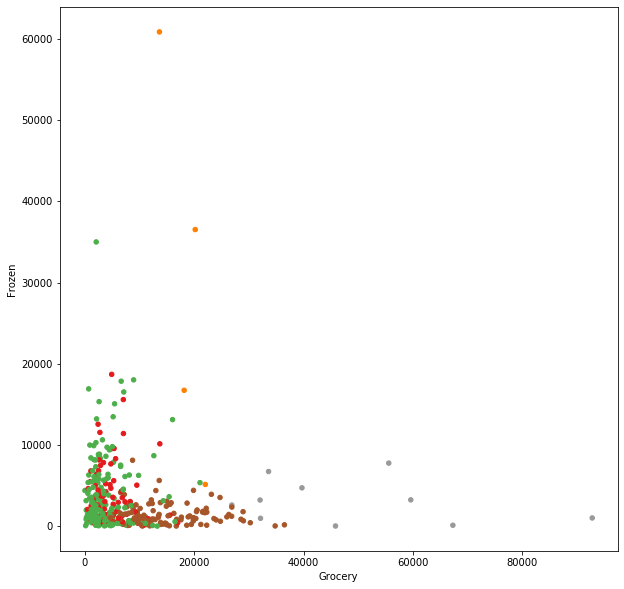

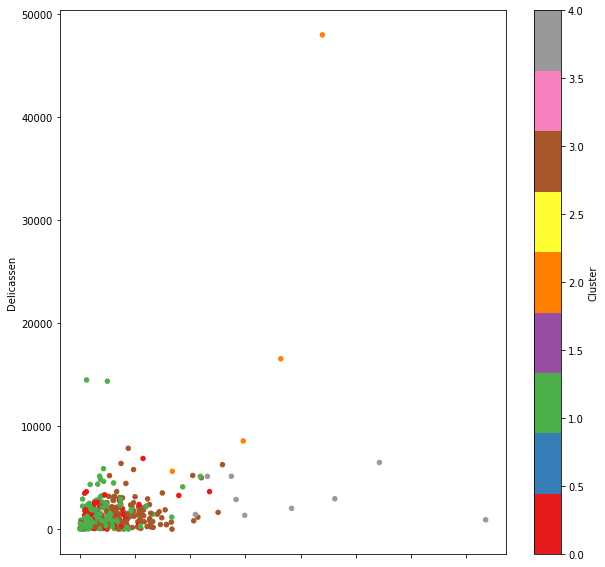

In [44]:

'''
[Step 4] k-means 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성  k=5
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

# 모형 학습
kmeans.fit(X)   

# 예측 (군집) 
cluster_label = kmeans.labels_   
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

# 그래프로 표현 - 시각화 8개 변수 하나의 그래프로 표현 불가 2개만 선택
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()


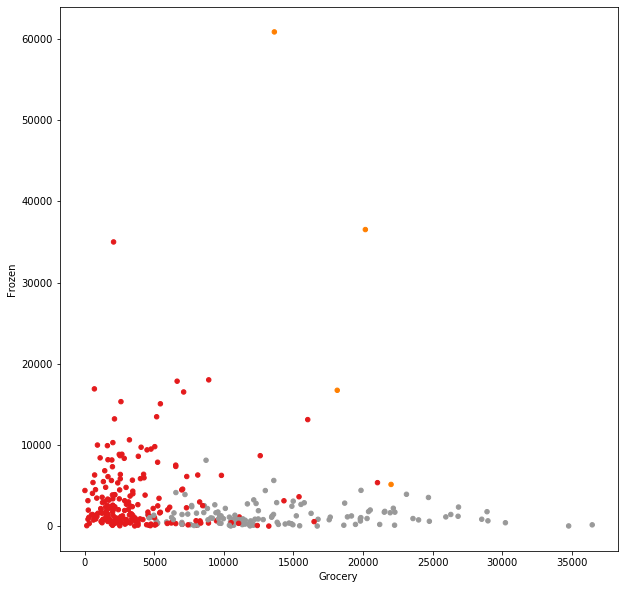

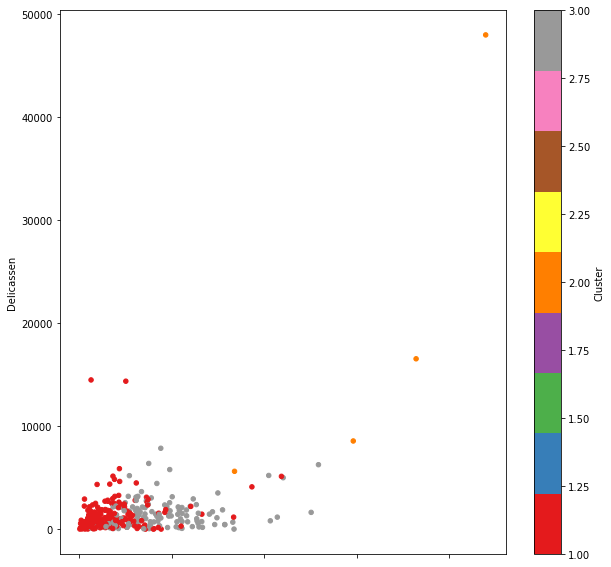

In [45]:

# 큰 값으로 구성된 클러스터(0, 4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()


4-2.DBSCAN

DBSCAN : 데이터가 위치하고 있는 공간 밀집도를 기준으로 클러스터를 구분. 
코어 포인트 : 자기를 중심으로 반지름 r의 공간에 최소 m개의 포인트가 존재하는 점
경계 포인트 : 반지름 r 안에 다른 코어 포인트가 있을 경우
노이즈 : 코어도 아니고 경계도 아닌 점



In [73]:
import pandas as pd
import folium

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# 서울시내 중학교 진학률 데이터셋 (출처: 교육???)
file_path = 'C:/Users/pc/Desktop/판다스터디/5674-833_4th/part7/2016_middle_shcool_graduates_report.xlsx'
df = pd.read_excel(file_path, header=0)

# IPython Console 디스플레이 옵션 설정하기
pd.set_option('display.width', None)        # 출력화면의 너비
pd.set_option('display.max_rows', 100)      # 출력할 행의 개수 한도
pd.set_option('display.max_columns', 10)    # 출력할 열의 개수 한도
pd.set_option('display.max_colwidth', 20)   # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

# 열 이름 배열을 출력
df.drop(['Unnamed: 0'],axis = 1,inplace = True)#해야함
print(df.columns.values)   
print('\n')

['지역' '학교명' '코드' '유형' '주야' '남학생수' '여학생수' '일반고' '특성화고' '과학고' '외고_국제고'
 '예고_체고' '마이스터고' '자사고' '자공고' '기타진학' '취업' '미상' '위도' '경도']




In [74]:

'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

# 지도에 위치 표시
mschool_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

# 중학교 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=5,              # 원의 반지름
                        color='brown',         # 원의 둘레 색상
                        fill=True,
                        fill_color='coral',    # 원을 채우는 색
                        fill_opacity=0.7,      # 투명도    
                        popup=name
    ).add_to(mschool_map)

# 지도를 html 파일로 저장하기
mschool_map.save('./seoul_mschool_location.html')



     지역                               학교명  코드  유형  주야  ...  \
0  성북구  서울대학교사범대학부설중학교.....       3  국립  주간  ...   
1  종로구  서울대학교사범대학부설여자중학교...     3  국립  주간  ...   
2  강남구           개원중학교                     3  공립  주간  ...   
3  강남구           개포중학교                     3  공립  주간  ...   
4  서초구           경원중학교                     3  공립  주간  ...   

   기타진학  취업   미상       위도        경도  
0     0.004     0  0.000  37.594942  127.038909  
1     0.031     0  0.000  37.577473  127.003857  
2     0.009     0  0.003  37.491637  127.071744  
3     0.019     0  0.000  37.480439  127.062201  
4     0.010     0  0.000  37.510750  127.008900  

[5 rows x 20 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 20 columns):
지역        415 non-null object
학교명       415 non-null object
코드        415 non-null int64
유형        415 non-null object
주야        415 non-null object
남학생수      415 non-null int64
여학생수      415 non-null int64
일반고       415 non-null floa

In [75]:
'''
[Step 3] 데이터 전처리
'''

# 원핫인코딩(더미 변수)
from sklearn import preprocessing    

label_encoder = preprocessing.LabelEncoder()     # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder()   # one hot encoder 생성

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

print(df.head())   
print('\n')

     지역                               학교명  코드  유형  주야  ...  \
0  성북구  서울대학교사범대학부설중학교.....       3  국립  주간  ...   
1  종로구  서울대학교사범대학부설여자중학교...     3  국립  주간  ...   
2  강남구           개원중학교                     3  공립  주간  ...   
3  강남구           개포중학교                     3  공립  주간  ...   
4  서초구           경원중학교                     3  공립  주간  ...   

         경도  location  code  type  day  
0  127.038909        16     0     1    0  
1  127.003857        22     0     1    0  
2  127.071744         0     0     0    0  
3  127.062201         0     0     0    0  
4  127.008900        14     0     0    0  

[5 rows x 24 columns]




In [76]:
'''
[Step 4] DBSCAN 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기 
from sklearn import cluster

# 분석에 사용할 속성을 선택 (과학고, 외고국제고, 자사고 진학률) 설명 변수
columns_list = [9,10,13]  #-->여기서 차이 해결
X = df.iloc[:, columns_list]
print(X[:5])
print('\n')

# 설명 변수 데이터를 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# DBSCAN 모형 객체 생성 반지름 0.2, m=5
dbm = cluster.DBSCAN(eps=0.2, min_samples=5)

# 모형 학습
dbm.fit(X)   
 
# 예측 (군집)  -1은 노이즈. 노이즈 제외 4개-->11? 위의 칼럼리스트 해결
cluster_label = dbm.labels_   
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df)
print('\n')




   과학고  외고_국제고  자사고
0   0.018        0.007   0.227
1   0.000        0.035   0.043
2   0.009        0.012   0.090
3   0.013        0.013   0.065
4   0.007        0.010   0.282


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  2 -1  0 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0  3 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1  0
 -1 -1 -1  0 -1 -1 -1 -1  0 -1  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1
 -1 -1  0 -1 -1 -1  0  2  0  0  0  0  0 -1 -1 -1  0 -1  0 -1 -1  0 -1  0
 -1  0  0 -1 -1 -1 -1  1  0 -1  0  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0  1 -1
 -1  0  2  0 -1 -1  1 -1 -1 -1  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1
 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  0 -1  0  0 -1 -1
 -1 -1 -1  0 -1 -1 -1  1  0  3  1 -1  0  0 -1  0 -1 -1  0  0  2 -1 -1  3
  0  0 -1 -1 -1 -1  0 -1  0  0 -1  0  0  0 -1 -1  0 -1 -1 -1 -1 -1  2  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1  3  0  2 -1 -1
 -1 -1  0 -1 -1 -1  

In [81]:
# 클러스터 값으로 그룹화하고, 그룹별로 내용 출력 (첫 5행만 출력)
grouped_cols = [0, 1, 3] + columns_list
grouped = df.groupby('Cluster')
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))     #속하는 포인트 개수
    print(group.iloc[:, grouped_cols].head())
    print('\n')


* key : -1
* number : 255
     지역                               학교명  유형  과학고  외고_국제고  \
0  성북구  서울대학교사범대학부설중학교.....    국립   0.018        0.007   
1  종로구  서울대학교사범대학부설여자중학교...  국립   0.000        0.035   
2  강남구           개원중학교                  공립   0.009        0.012   
3  강남구           개포중학교                  공립   0.013        0.013   
4  서초구           경원중학교                  공립   0.007        0.010   

   자사고  
0   0.227  
1   0.043  
2   0.090  
3   0.065  
4   0.282  


* key : 0
* number : 102
      지역          학교명  유형  과학고  외고_국제고  자사고
13  서초구  동덕여자중학교  사립     0.0        0.022   0.038
22  강남구      수서중학교  공립     0.0        0.019   0.044
28  서초구      언남중학교  공립     0.0        0.015   0.050
34  강남구      은성중학교  사립     0.0        0.016   0.065
43  송파구      거원중학교  공립     0.0        0.021   0.054


* key : 1
* number : 45
         지역          학교명  유형  과학고  외고_국제고  자사고
46     강동구      동신중학교  사립     0.0          0.0   0.044
103    양천구      신원중학교  공립     0.0          0.0   0.006
118    구로구     

In [82]:
# 그래프로 표현 - 시각화
colors = {-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple', 
          5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan', 11:'tan'}

cluster_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster_map)
    # 지도를 html 파일로 저장하기
cluster_map.save('./seoul_mschool_cluster.html')


# X2 데이터셋에 대하여 위의 과정을 반복(과학고, 외고국제고, 자사고 진학률 + 유형)
columns_list2 = [9, 10, 13, 22]
X2 = df.iloc[:, columns_list2]
print(X2[:5])
print('\n')


X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
dbm2 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm2.fit(X2)  
df['Cluster2'] = dbm2.labels_   

grouped2_cols = [0, 1, 3] + columns_list2
grouped2 = df.groupby('Cluster2')
for key, group in grouped2:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped2_cols].head())
    print('\n')

cluster2_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster2_map)
# 지도를 html 파일로 저장하기
cluster2_map.save('./seoul_mschool_cluster2.html')

   과학고  외고_국제고  자사고  type
0   0.018        0.007   0.227     1
1   0.000        0.035   0.043     1
2   0.009        0.012   0.090     0
3   0.013        0.013   0.065     0
4   0.007        0.010   0.282     0


* key : -1
* number : 281
     지역                               학교명  유형  과학고  외고_국제고  \
0  성북구  서울대학교사범대학부설중학교.....    국립   0.018        0.007   
1  종로구  서울대학교사범대학부설여자중학교...  국립   0.000        0.035   
2  강남구           개원중학교                  공립   0.009        0.012   
3  강남구           개포중학교                  공립   0.013        0.013   
4  서초구           경원중학교                  공립   0.007        0.010   

   자사고  type  
0   0.227     1  
1   0.043     1  
2   0.090     0  
3   0.065     0  
4   0.282     0  


* key : 0
* number : 8
       지역      학교명  유형  과학고  외고_국제고  자사고  type
22   강남구  수서중학교  공립     0.0        0.019   0.044     0
43   송파구  거원중학교  공립     0.0        0.021   0.054     0
51   송파구  방이중학교  공립     0.0        0.021   0.068     0
93   강서구  방원중학교  공립     0.0        0.019 

In [83]:

# X3 데이터셋에 대하여 위의 과정을 반복(과학고, 외고_국제고)
columns_list3 = [9, 10]
X3 = df.iloc[:, columns_list3]
print(X3[:5])
print('\n')

X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
dbm3 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm3.fit(X3)  
df['Cluster3'] = dbm3.labels_   

grouped3_cols = [0, 1, 3] + columns_list3
grouped3 = df.groupby('Cluster3')
for key, group in grouped3:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped3_cols].head())
    print('\n')

cluster3_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster3_map)

# 지도를 html 파일로 저장하기
cluster3_map.save('./seoul_mschool_cluster3.html')

   과학고  외고_국제고
0   0.018        0.007
1   0.000        0.035
2   0.009        0.012
3   0.013        0.013
4   0.007        0.010


* key : -1
* number : 61
     지역                             학교명  유형  과학고  외고_국제고
0  성북구  서울대학교사범대학부설중학교.....  국립   0.018        0.007
3  강남구           개포중학교                공립   0.013        0.013
6  강남구         압구정중학교                공립   0.015        0.036
7  강남구  단국대학교사범대학부속중학교.....  사립   0.032        0.005
8  강남구           대명중학교                공립   0.013        0.029


* key : 0
* number : 160
      지역                               학교명  유형  과학고  외고_국제고
1   종로구  서울대학교사범대학부설여자중학교...  국립     0.0        0.035
13  서초구       동덕여자중학교                  사립     0.0        0.022
22  강남구           수서중학교                  공립     0.0        0.019
28  서초구           언남중학교                  공립     0.0        0.015
29  강남구           언북중학교                  공립     0.0        0.007


* key : 1
* number : 111
      지역      학교명  유형  과학고  외고_국제고
2   강남구  개원중학교  공립   0.009        